<div style="background-color: rgba(25, 0, 80, 0.05); color: #ffff; padding: 20px;">

# Auroral rays: 
# Propagation & Interaction of Charged Particles with a Magnetosphere

------
------
------
    
</div>

### Relevant clip from $\textbf{"The Simpsons"}$:

In [1]:
from IPython.display import HTML
# Code snippet - Christopher Lovell
HTML('<iframe width="560" height="315" \
     src="https://www.youtube.com/embed/Rj0Tj8dnrYw?rel=0&amp;controls=0&amp;showinfo=0" \
     frameborder="0" allowfullscreen></iframe>')

C:\Users\ENG\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### $\textit{Localized entirely within our Jupyterlab Notebook!}$
------
------
------

<div style="background-color: rgba(10, 0, 175, 0.55); color: #fff; padding: 20px;">
<div style="font-size: 15px; text-align: left;">
$\textrm{"The Aurora is mesmerizing, dynamic displays of light that appear in the Antarctic skies in winter.} \\ \textrm{ They are, in effect, nature's light show; visual poetry penned from the quantum leaps of atmospheric gases.} \\ \textrm{ As those who have witnessed the Aurora can attest, few sights can equal the magic and mystery of these}\\ \textrm{ luminous sheets of colour undulating in the frigid air of the Antarctic winter." } \textit{   —Menal Salim}$  
</div>
</div>

------

### Background Narrative

$\textbf{Our story begins at the center of the solar system: }$ Earth's host star is incredibly hot. Reaching temperatures of nearly one million Centigrade [4], electrons certainly begin to tear from atoms, turning the Sun's corona into an intense soup of free ions and electrons (i.e. plasma). As our central star is constantly changing yet wanting to remain in a state of hydrostatic equilibrium, there are occasional bursts of material which the Sun's gravitational force can no longer keep captured. Bits and bobs of plasma are hurtled to the far reaches of our solar system (as far as and beyond Pluto [4]), interacting with objects along the way.

$\textbf{Lucky as we are, }$ the Earth generates its own powerful, dynamic magnetic field which can interact, guide and subsequently prevent any deadly coronal mass ejections (CMEs) from stripping away our entire atmosphere and ending the normalcy of life as we know it. These cyclic events are associated with the buildup and outburst of the Sun's magnetic energy, clouds of dense plasma traveling even faster than solar wind which greatly agitate the magnetosphere in a "magnetic" storm [1].

$\textbf{So, what does an aurora actually entail? }$ When energetic charged particles enter the Earth's atmosphere from either solar wind or CMEs, they are channeled towards the true magnetic poles due to the Earth's magnetosphere, causing them to spiral around the magnetic field lines. These particles are energetic enough to ionize air molecules, leading to a considerable portion of molecules jumping to excited states; therefore, upon returning to their ground state, light (in and beyond the visible portion of the EM spectrum) is emitted from molecular nitrogen, oxygen, etc. as a function of the atmospheric composition dependent on altitude and other factors. A chain of events occurs as energetic electrons (and some protons) inject energy into the high atmosphere, reducing their kinetic energy as they go.

------
------
------

## ODE: 3-D Lorentz Force

From electrodynamics, we know that the Lorentz force experienced by a charged particle with velocity $\vec{v}$ in some magnetic field goes as:
$$
\begin{align}
 \frac{\vec{F}}{m} & = \vec{a} = \frac{d\vec{v}}{dt},\\
 \frac{d\vec{v}}{dt} & = \frac{q}{m}(\vec{v}\times\vec{B}),\\
 \frac{d\vec{v}}{dt} & = \gamma_{e}(\vec{v}\times\vec{B})
   \end{align} $$

Notice that we allow for simplification by assuming each charged particle acts as an electron ($\gamma_e$ represents its gyromagnetic ratio). To a good approximation, the solar wind is only composed of protons and electrons, where we will neglect the former for our current investigation.

### Coordinate System

Before we decide how to create our magnetic field, we must be consistent in our usage of coordinates!\
In our case, after struggling to work with conversions between spherical and cartesian, we decide to stick with a **cartesian coordinate system** definitively.

Disregarding inhomogeneities and external magnetic fields, the magnetosphere for some arbitrary planet can be well considered as a **dipole field:**

$$
\begin{align} 
\vec{\textbf{B}}_\textrm{dipole} &= B_x\hat{x}+B_y\hat{y}+B_z\hat{z}\\
B_x &= 3M\frac{xz}{r^5}\\
B_y &= 3M\frac{yz}{r^5}\\
B_z &= M\frac{(3z^2-r^2)}{r^5} 
\end{align}
$$

where $M$ is the magnetic dipole moment involved in whatever planetary-particle interaction we're inspecting; $r$ represents a coordinate radius, simply calculated as the positional magnitude $|\vec{r}| = \sqrt{x^2+y^2+z^2}$.

#### $(\vec{\textbf{v}}\times\vec{\textbf{B}})$ Calculation
In order to submit our **state vector** to odeint or some similar `integration algorithm`, we need to discover (1) the three cartesian velocity components, (2) three acceleration components.

Fortunately, the derivative of the position vector $\vec{\textbf{x}}$ is simply $\vec{\textbf{v}}$, which we can arbitrarily return.

Less trivially, the derivative of the velocity vector $\vec{\textbf{v}}$ becomes acceleration $\vec{\textbf{a}}$, which is governed by $\gamma_{e}(\vec{\textbf{v}}\times\vec{\textbf{B}})$ as seen previously:

$$
\begin{align} 
\vec{\textbf{B}}_\textrm{dipole} &= B_x\hat{x}+B_y\hat{y}+B_z\hat{z}\\
\left(\vec{\textbf{v}}\times\vec{\textbf{B}}\right) &= \left(\left(v_x\hat{x}+v_y\hat{y}+v_z\hat{z}\right)\times\left(B_x\hat{x}+B_y\hat{y}+B_z\hat{z}\right)\right)\\
\end{align}
$$

----

This can quickly get messy, so let's compute each cross product in isolation:

$\textbf{v}_{x}\hat{\textbf{x}} \times \vec{\textbf{B}}$

$$
\begin{align} 
\left(v_x\hat{x}\times B_x\hat{x}\right) &= 0\\
\left(v_x\hat{x}\times B_y\hat{y}\right) &= v_xB_y\left(\hat{x}\times\hat{y}\right) = v_xB_y\left(\hat{z}\right)\\
\left(v_x\hat{x}\times B_z\hat{z}\right) &= v_xB_z\left(\hat{x}\times\hat{z}\right) = v_xB_z\left(-\hat{y}\right)\\
\end{align}
$$

$\textbf{v}_{y}\hat{\textbf{y}} \times \vec{\textbf{B}}$

$$
\begin{align} 
\left(v_y\hat{y}\times B_x\hat{x}\right) &= v_yB_x\left(\hat{y}\times\hat{x}\right) = v_yB_x\left(-\hat{z}\right)\\
\left(v_y\hat{y}\times B_y\hat{y}\right) &= 0\\
\left(v_y\hat{y}\times B_z\hat{z}\right) &= v_yB_z\left(\hat{y}\times\hat{z}\right) = v_yB_z\left(\hat{x}\right)\\
\end{align}
$$

$\textbf{v}_{z}\hat{\textbf{z}} \times \vec{\textbf{B}}$

$$
\begin{align} 
\left(v_z\hat{z}\times B_x\hat{x}\right) &= v_zB_x\left(\hat{z}\times\hat{x}\right) = v_zB_x\left(\hat{y}\right)\\
\left(v_z\hat{z}\times B_y\hat{y}\right) &= v_zB_y\left(\hat{z}\times\hat{y}\right) = v_zB_y\left(-\hat{x}\right)\\
\left(v_z\hat{z}\times B_z\hat{z}\right) &= 0
\end{align}
$$

----
By quick rearrangement, we find that the electron acceleration $\vec{\textbf{a}}$ goes like

$$
\begin{align} 
\vec{\textbf{a}} &= a_x\hat{\textbf{x}}+a_y\hat{\textbf{y}}+a_z\hat{\textbf{z}}\\
 &\approx v_xB_y\left(\hat{z}\right)+v_xB_z\left(-\hat{y}\right)+v_yB_x\left(-\hat{z}\right)+v_yB_z\left(\hat{x}\right)+v_zB_x\left(\hat{y}\right)+v_zB_y\left(-\hat{x}\right)\\
 &\approx v_yB_z\left(\hat{x}\right)+v_zB_y\left(-\hat{x}\right)+v_zB_x\left(\hat{y}\right)+v_xB_z\left(-\hat{y}\right)+v_xB_y\left(\hat{z}\right)+v_yB_x\left(-\hat{z}\right)\\
\vec{\textbf{a}} &= \gamma_e\left(v_yB_z-v_zB_y\right)\hat{\textbf{x}}+\gamma_e\left(v_zB_x-v_xB_z\right)\hat{\textbf{y}}+\gamma_e\left(v_xB_y-v_yB_x\right)\hat{\textbf{z}}
\end{align}
$$

Look, we've now just derived the values for $a_x$, $a_y$, and $a_z$!\
Let's have a go at creating some Python code for a Lorentz state vector now.

<div class="alert alert-block alert-info">
Distilled from several iterations of scratch notebooks:
</div>

```python
import numpy as np
```

```python
"""State vector of Lorentz Force, inputs are time (array) 
and state vector (positions, velocities) in cartesian coordinates."""
def lorentzDeriv(t, R):
    x,   y,  z = R[0], R[1], R[2] # retrieve cartesian positions,
    vx, vy, vz = R[3], R[4], R[5] # velocities.
    
    r  = np.sqrt(x**2 + y**2 + z**2)
    
    bx = 3*M * ((x*z) / r**5)      # cartesian dipole components.
    by = 3*M * ((y*z) / r**5)
    bz =   M * ((3*z**2 - r**2) / r**5)

    return np.array([vx, vy, vz,
                     gyr * (vy*bz - vz*by),     # (v x B)\hat{x}
                     gyr * (vz*bx - vx*bz),     # (v x B)\hat{y}
                     gyr * (vx*by - vy*bx)])    # (v x B)\hat{z}

```

## Problem 1
(5 points)

(a) When considering particles which travel extremely close to the origin, we will be dealing with division by zero and overflow errors of the likes. An electron reaching this position in the first place would be entirely unphysical for our setup, we should enact a condition to check and consequentially respond to any particle trajectories leading inside of the Earth.
 __Explain how we should best approach this__.

### Solution:

To fix this issue, we implement a small addition to the `lorentzDeriv()` function:

```python
    if r < re:
        return np.array([0,0,0,
                         0,
                         0,
                         0])
```

If a particle is seen to be within an Earth radius of the origin, we will immediately terminate that electron by setting its velocity and acceleration to zero. Physically, this would correspond to the electron ramming into the surface of our planet (ideally at one of the poles).

This acts as a natural segue into the conversation of units, as we need to define _what we mean_ by `re` in our code statement.

----

### Unit Consistency

```python
re = (6.957*10**8)
```

We choose to use **SI units** when applicable.

Here, `re`, the radius of our Earth, is given in meters.

**Likewise,** we know the electron gyromagnetic ratio $|\gamma_e| \approx 1.7588\times10^{11}$ $Hz/T$ or $C/kg$.
The Earth's magnetic dipole moment $M \approx -8\times10^{15}$ $T\cdot m^3$.\
Assuming we want an acceleration in the end
$$
\begin{align}
 \frac{d\vec{v}}{dt} = \vec{\textbf{a}} &= \gamma_{e}(\vec{v}\times\vec{B})\\
 &= \frac{Hz}{T}\left(\frac{m}{s}\cdot T\right)\\
 [\vec{\textbf{a}}] &= \frac{1}{s}\left(\frac{m}{s}\right) = \frac{m}{s^2}
   \end{align} $$

which completely checks out! 

**But,** not being too hasty, let's ensure that $M$ is equivalent to units of Tesla when shoved through our state vector B-field components.\
_Each magnetic field component_ goes like a distance squared over distance to the fifth power:

$$
\begin{align} 
B_i &\approx M\frac{m^2}{m^5}\\
B_i &= M\frac{1}{m^3}\\
[B_i] &= \frac{T\cdot m^3}{m^3}\\
[B_i] &= T
\end{align}
$$

> ___All of the units so far are consistent.___

----

### Initial Condition Generation

__It's crucial to consider what an incoming electron will look like!__ 
- *Where in space will it be located?* 
- *How fast will this charged particle be traveling?* 
- *In what directions will it be headed, on average?*

> Our stream of charged particled released from the sun travel at speeds of $250-750$ $km/s$ (supersonic speeds). Nicely enough, this implies that our electrons only travel at a mere $0.1\%$ the speed of light, allowing for a classical prescription for each particle.

> While great care can be given to the treatment of electron energy distribution, let's first make the assumption that electron speeds are centered around $500$ $km/s$ with some deviation spanning a sigma of $250$ $km/s$. We realize that electron energy distribution functions *do exist*, but will not be considering them here in the interest of time.

Using a normal distribution centered about the mean with a related sigma, we implement an **initial velocity** about an arbitrary direction relative to the Earth for our configuration (we will choose incoming particles to travel in the $-\hat{\textbf{x}}$ direction).

As for **initial positions**, let's focus on generating a planar wave of incoming particles, such that their $\hat{\textbf{x}}$ locations are identical at some $t=t_0$, whereas their $\hat{\textbf{y}}$ and $\hat{\textbf{z}}$ positions are randomized across the y-z plane spanning beyond a distance of `re`.

```python
"""Randomized initial condition generation 
for input of 'N'-many electrons."""
def initial_conditions(N):
    sws    = -500*10**3
    # Solar wind speed: 500 km/s -> m/s.
    
    randy  = (np.random.random(N) * 4*re) - 4*re/2 
    # y-z plane of incoming electron positions,
    randz  = (np.random.random(N) * 4*re) - 4*re/2 
    # spans -2*re to +2*re square.

    randvx = np.random.normal(loc=-sws, scale=sws/2, size=N)

    x0 = []
    for i, item in enumerate(randy):
        x0.append([2*re, randy[i], randz[i]]) 
        # all electrons start 2*re away from Earth in \hat{x}.

    v0 = []
    for i, item in enumerate(randvx):
        v0.append([randvx[i], 0, 0])
        
    return x0, v0
```

## Problem 2
(5 points)

(a) As we know, the Earth rotates with respect to the Sun with a roughly 24 hour frequency. This, compared to the timescales of incident electrons is most likely insignificant. However, slight deviations in the trajectory of solar wind particles due to external magnetic fields and other solar inhomogeneities provide reason to change initial $\hat{\textbf{y}}$ and $\hat{\textbf{z}}$ velocities.
 __Implement slight deviations in all components of velocity to account for this__.

### Solution:

Rather than assuming a uniform planar wave, we now include variables `randvy` and `randvz` in `initial_conditions()`:

```python
def initial_conditions(N):
    sws    = -500*10**3
    
    randy  = (np.random.random(N) * 4*re) - 4*re/2
    randz  = (np.random.random(N) * 4*re) - 4*re/2

    randvx = np.random.normal(loc=sws, scale=abs(sws/2), size=N)
    randvy = np.random.normal(loc=0, scale=abs(sws/1e1), size=N) # deviations from planar wave
    randvz = np.random.normal(loc=0, scale=abs(sws/1e1), size=N) # in both y- and z-directions.

    x0 = []
    for i, item in enumerate(randy):
        x0.append([2*re, randy[i], randz[i]])

    v0 = []
    for i, item in enumerate(randvx):
        v0.append([randvx[i], randvy[i], randvz[i]])
        
    return x0, v0
```

We assume that deviations in the $\hat{\textbf{y}}$ and $\hat{\textbf{z}}$ velocity components _do not exceed_ $10\%$ of the oncoming $v_x$ speed.\
Thus, our planar wave of particles with identical initial directions (but varying magnitudes) now creates slight fluxuations in oncoming directional vectors!

----

### Integration using odeint

We begin by importing an integration package from `scipy` as well as some basic plotting framework from `matplotlib`.

```python
import scipy.integrate as integrate

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
```

> The magic command for `%matplotlib notebook` allows for manipulation of the 3-D space created.\
The secondary command displays high definition visuals.

```python
%matplotlib notebook
%config InlineBackend.figure_format='retina'
```

#### Let's initialize a single particle!
We generate randomized initial conditions for our Lorentz state vector, and save the output to `x0` and `v0`.

```python
x0,v0 = initial_conditions(1)
```

Previously quoted physical parameters are created in **SI units**.
> We construct a **time array** with semi-arbitrary resolution and ending time. This will heavily depend upon parameters used, but it has been found that this time scaling provides an adequate amount of information (can be changed as the user sees fit).

```python
dt = 1e-1
t0 = 0.
t  = np.arange(t0, 500, dt)

# gyromagnetic ratio is set for electron [Hz/T]. Magnetic dipole moment of Earth [T*m^3].
gyr = -1.759e11; M = -8e15;
```

> Efficiently, we call `integrate.odeint()` with our `lorentzDeriv()` function, `initial_condition` list, `t` time array, and the argument `tfirst` to signify that our "*integratee*" intakes time first, then a state vector. This will utilize a Runge-Kutta 4 method to yield a list of solved particle positions!

```python
posList = []
for index, particle in enumerate(x0):
    initial_condition = np.concatenate((x0[index], v0[index]))
    
    """Call scipy.integrate.odeint() with lorentzDeriv function, 
        concatenated inital conditions for the state vector, 
        a time array, t, and the parameter tfirst=True, 
        which signifies that lorenzDeriv(t,R) takes time as its first argument."""
    positions = integrate.odeint(func=lorentzDeriv, y0=initial_condition, t=t, tfirst=True)
    posList.append(positions) # save the solved positions for each particle.
```

> Now, let's __initialize a 3-D matplotlib figure__ and begin to decompose each **electron's trajectory** into its constituent parts. \
Scatter plot the <span style="color:red">initial positions in red</span> and subsequent path as a solid (or dotted) line, tracing the life of each particle until it meets an inevitable, untimely demise.

```python
fig = plt.figure() # initialize 3-D matplotlib figure.
ax = fig.add_subplot(111, projection='3d')

for positions in posList:
    pos = np.array(positions[:,0:3]) # save state vector positions,
    vel = np.array(positions[:,3:6]) # velocities (x, y, z).

    ax.plot(cart.T[0], cart.T[1], cart.T[2], alpha=0.75) # plot electron trajectories.
    ax.scatter3D(cart.T[0][0], cart.T[1][0], cart.T[2][0], color='red') 
    # signal starting location.
```

> Because the Earth's magnetic field will tend to deflect some amount of charged particles, we want to lock our screen to visualize the space within two Earth radii of the origin or so. We label the axes accordingly, and create a model Earth for scale reference when viewing.

```python    
# label plot axes.
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

# set limits on visualized 3-D space.
c = 2*re;
plt.xlim(-c,c)
plt.ylim(-c,c)
ax.set_zlim(-c,c)

# draw sphere, scaled to re.
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = re * np.cos(u) * np.sin(v)
y = re * np.sin(u) * np.sin(v)
z = re * np.cos(v)
ax.plot_wireframe(x, y, z, color="hotpink")

plt.show()
```

> ***Amazing,*** we're at the point where we can easily visualize the trajectory of electrons flinging at high speeds towards the Earth!

------
------
------

## Atmospheric Energy Injection

$\textbf{As we know, energetic charged particles enter the Earth's atmosphere from solar wind.}$ They tend to channel towards the poles due to the Earth's magnetosphere, causing them to spiral around the magnetic field lines. These particles are energetic enough to ionize air molecules, leading to a considerable amount elevating to excited states. When they transition back to their ground states, light is emitted from oxygen, nitrogen, and other compounds found in the Earth's atmospheric composition.

$\textbf{As they penetrate into the upper atmosphere,}$ the chance of colliding with an atom or molecule increases the deeper they go. Once a collision takes place, the atom or molecule takes some of the energy of the energetic particle and stores it as internal energy while the electron goes on with a reduced speed. The process of storing energy in a molecule or atom is called "exciting" the atom". An excited atom or molecule can return to the non-excited state (ground state) by sending off a photon, i.e. by making light.

$\textbf{Oxygen is responsible for two primary auroral colours:}$ green-yellow wavelength of 557.7 nanometres (nm) is most common, while the deep red 630.0 nm light is seen less frequently.

$\textbf{Nitrogen in an ionized state will produce blue light,}$ while neutral nitrogen molecules create purplish-red auroral colours. For example, nitrogen is often responsible for the purplish-red lower borders and rippled edges of the aurora.

## Problem 3
(20 points)

(a) Somehow, we must imitate the injection of energy into atmospheric molecules as well as simultaneous dragging and scattering of electrons. The first obvious choice is to decrease the kinetic energy of each electron zipping through space as we step through time. This would be equivalent to some effective [mean free path](https://en.wikipedia.org/wiki/Mean_free_path) (realistically, this would vary as a function of altitude as the vaccum of space forms a gradient with the Earth's ambient molecular number density).

 __Write a piece of code which will drop a particle's energy as we iterate through `dt`__.

### Solution:

__The solution is non-trivial__: we can attempt to equate a change in time to some distance scale relavant to the mean free path of our electron. However, this would imply that `dt` would need to vary in "density" depending on position which presents quite a challenge to our implementation.

__For the sake of simplicity and in the interest of time,__ we will assume that atmospheric interactions contribute to energy losses on the scale of $1\% - 10\%$ of each particle's kinetic energy and corresponding velocity vectors (regardless of radial height).

In this fashion, a typical particle will undergo ~$100$ or less interactions before coming to a halt in the absence of an external field to provide a Lorentz force (or abruptly vanishing from contacting Earth's surface beforehand).\
However, __with our magnetic field,__ some particles will deflect from the Earth, others will become trapped due to magnetic mirroring, and the rest will hit the Earth's surface! The number of iterations gone through before stopping or coming to rest will likely vary wildly.

Moreover, `scipy.integrate.odeint()` will not directly suffice in this scenario; rather, we must use a slightly different function call to handle steps in our time array:

```python
from scipy.integrate import ode
```

As shown below, we can quickly switch between __integration methods__! We find that `'vode'` works quite well with a large number of particles, and will be subsequently using this for later analysis.

```python
solver = ode(lorentzDeriv).set_integrator('dopri5') # Implements an explicit runge-kutta order (4).
solver = ode(lorentzDeriv).set_integrator('vode')   # Real-valued Variable-coefficient ODE solver.
```

#### Now, for the brains of the energy loss machinery!
We admit that there are better ways to enact an algorithm such as this; however, the following will do for a first-go.\
Let's quickly import a very useful rotational transformation tool from `scipy`!

```python
from scipy.spatial.transform import Rotation as R
```

`rand_mod()` generates a **randomized rotation matrix** which is then applied to the solver's positional values $(x,y,z)$.\
Since this only modifies the direction of our outgoing electron after scattering, we also return a randomized magnitude with its distribution heavily skewed towards 1. Realistically, this energy loss would be velocity-dependent, varying based on the interaction type with certain kinds of molecules.

In the future, we could easily update this framework to account for each particle's velocity magnitude and subsequently adjust the energy losses based on observed phenomena and related equations quoted in [rpp2018-rev-passage-particles-matter.pdf](https://pdg.lbl.gov/2019/reviews/rpp2018-rev-passage-particles-matter.pdf).

```python
# assuming scattering probability is uniform in θ.
def rand_mod(solver):
    rand = np.random.random((3,3))*90
    r    = R.from_euler('zyx', rand, degrees=True)
    vrot = r.apply([solver.y[3],solver.y[4],solver.y[5]])[-1] # rotates the vectors randomly.

    # generate a random magnitude centered around 0.95.
    ranx2 = np.random.normal(loc=0.95, scale=0.015, size=1)
    return vrot, ranx2 # return a down-scaled unit vector.
```

Take a gander at the distribution we use for amount of energy injected into the Earth's atmosphere!\
It follows (we assume) a simple normal distribution ranging in electron energy losses of $1 - 10 \%$.

<img src="figures/figure1.png" width="500">

> For every `dt` iteration, we take the most recent velocities and call `rand_mod()` to modify and emulate interaction energy loss/injection.

__Note:__ Time-steps are arbitrary and could be later associated with our physical parameters (**MKS** unit convention). \
Before decrementing velocities, we check if the radial magnitude of our particle is below some threshold altitude (in our case `1.5*re`) as well as some time step modulus (`rs % 2 == 0`) to ensure we don't interact with atmospherical molecules *too* often! Again, this would ideally be linked to a realistic number density and subsequent interaction probability as a function of height above the surface of the Earth.

```python
posList = []
tf = 1e5 # allow for particle to travel for quite some time.
dt = 1e2 # drag by ~3 orders of magnitude for peak computational efficiency & resolution.
for index, particle in enumerate(x0):
    initial_condition = np.concatenate((x0[index], v0[index]))
    solver.set_initial_value(initial_condition, t0)
```

> **Sweet, so for each particle initialized, let's loop through and set its initial conditions.** \
Afterwards, we take our time array `t` and iterate! The first time our code comes through, we immediately integrate our first, randomized state vector. Then, in calculating the magnitude of the electron's position, we can check to see if we've yet come below the threshold for our atmosphere: if yes, we calculate energy losses every-so-often; if not, we continue calculating the particle's trajectory as normal!

__Note:__ Yes, we are aware that the Earth's **thermosphere** only spans to roughly `re + 0.013*re`, where auroral phenomena occasionally occur. Beyond this, the **exosphere** spans a whopping `re + 1.57*re`, but most likely does not contribute to the effects we wish to simulate to a significant degree. We will make an [initial assumption](https://en.wikipedia.org/wiki/Atmosphere_of_Earth) that the atmosphere contains a hard cutoff at `1.5*re` away from the origin.

```python
    rs = 0
    positions = []
    positions.append(initial_condition)
    # Iterate through scipy's ode solver --> tf.
    while solver.successful() and solver.t < tf:
        solver.integrate(solver.t+dt) 
        # modify state vector velocities and integrate.
        positions.append(solver.y[:6]) # track position and velocity components.
       
        posmag = np.sqrt(solver.y[0]**2+solver.y[1]**2+solver.y[2]**2); # obtain radial mag.
        
        if posmag <= (1.5*re) and (rs % 2) == 0: # set cutoff for atmospheric interactions.
            vrot, ranx2 = rand_mod(solver) # obtain random scattering direction, magnitude.
```

> Now that we've identified a particle in our target collision regime, we modify our most recent velocity components. Due to the funky nature of `scipy.integrate.ode`, we must re-assign our initial conditions to these modified values, the current time `solver.t`, and carry on.

__Note:__ I'm certain there are infinitely many ways to efficiently implement this without the use of these horrible loops. That being said, this doesn't run horribly either! In the future, a different package or custom integration algorithm could be used to majorly expedite this process.

```python
            solver.y[3] = vrot[0]*ranx2
            solver.y[4] = vrot[1]*ranx2
            solver.y[5] = vrot[2]*ranx2
            
        ic = np.concatenate(([solver.y[0],solver.y[1],solver.y[2]], 
                             [solver.y[3],solver.y[4],solver.y[5]]))  
        solver.set_initial_value(ic, solver.t)
        rs += 1 # running sum to deal with time steps.

    positions = np.array(positions)
    posList.append(positions)
```

> We've done it, we've drawn out all of the foundational framework and key concepts to build upon in our particle propagation endeavor! 

-----
-----
-----

## Let's simulate some flying electrons in a magnetosphere!

In `initial_conditions()`, we modify the starting y-z plane to be located at `cut*0.75` such that the electrons start very near the cutoff for our atmosphere.

```python
    x0 = []
    for i, item in enumerate(randy):
        x0.append([cut*0.75, randy[i], randz[i]]) # start right at edge of cutoff (distribution).
```

### Here's a fun set of parameters to use! 
>Let's walk through running the code and analyzing the results.

```python
gyr = -1.759e11; M = -8e12; 
# Earth's magnetic dipole moment has been modified to lower computation time.
cut = 1.5*re;                   # atmospheric cutoff is ~1.5*re.
x0,v0 = initial_conditions(20); # initialize twenty electrons.
tf = 1e5; dt = 1e2;             # define timescales and resolution.
```

<img src="figures/figure2.png" width="500">

> **Visually,** things can become quite cluttered (*especially as we increase the number of particles*) in this 3-D visualization. The <span style="color:red">red scatter dots</span> represent starting locations for electrons, with each trajectory plotted in a unique color. Some electrons escape the grasp of the Earth's magnetosphere, others are captured and brought into what seems like a stable orbit, the rest obliterate on the surface of Earth.

<img src="figures/figure3.png" width="500">

> **Here,** we plot the positional magnitude of the state vector for each electron at all timesteps. This reinforces our above view, since we can clearly see the different regimes of particle behavior! Electrons from our solar wind deflected by the Earth's magnetic field continue upwards, while the rest either collide (hit and <span style="color:hotpink">plateau at $R_{Earth}$</span>) or maintain an interesting oscillatory nature around the atmospheric cutoff value.

<img src="figures/figure4.png" width="500">

> **Similarly,** we plot each electron's velocity magnitude as a function of internal time and note similar features. We're relieved at the sight of the "captured" electrons decreasing in velocity, as this implies that our earlier implementation of energy losses is functioning as we want.

<img src="figures/figure5.png" width="500">

> **The first adiabatic invariant, $\mu$**, represents the magnetic moment of each gyrating electron. It is a constant of motion to all orders in an expansion of $\frac{\omega}{\omega_c}$, where $\omega$ is any change experienced by the particle due to collisions or variations in the external magnetic field.

> Shown above are *roughly* invariant quantities for each electron (different initial conditions than previous). \
<span style="color:crimson">Dark red hues </span>represent the collection of solar wind particles deflected or staying above our atmospheric cutoff.\
<span style="color:hotpink">Lighter pink and purple </span>identify those particles which fall under the atmospheric cutoff, interact with molecules and lose energy, subsequently shifting $\mu_e$ by *many* orders of magnitude.

__Note:__ When the magnetic moment of the electron $\mu_e$ *isn't* roughly constant over time, this corresponds to [certain important situations](https://en.wikipedia.org/wiki/Adiabatic_invariant#Plasma_physics) which may be identified within simulation.

- **Magnetic pumping:** If the collision frequency is larger than the pump frequency, $μ$ is no longer conserved. In particular, collisions allow net heating by transferring some of the perpendicular energy to parallel energy.
- **Cyclotron heating:** If $B$ is oscillated at the cyclotron frequency, the condition for adiabatic invariance is violated and heating is possible. In particular, the induced electric field rotates in phase with some of the particles and continuously accelerates them.
- **Magnetic cusps:** The magnetic field at the center of a cusp vanishes, so the cyclotron frequency is automatically smaller than the rate of any changes. Thus the magnetic moment is not conserved and particles are scattered relatively easily into the loss cone.

-----

### **We sought out to achieve the following:** 
 - Visualize our magnetosphere in 3-D space as well as 2-D slices
 - Plot the trajectories of individual electrons interacting with our magnetic field
 - Generalize to a greater distribution of charged particles with various energies
 - Describe the scattering interactions between atmospheric molecules andsaid electrons

**I hope that we have provided the foundational skills and tools necessary to succeed in this endeavor.**

Follow-up analysis could potentially revisit some of the kinks and assumptions made such that we could relate our simulation to its physical counterpart more accurately. Despite not reaching our end-goal of visualizing the aurora itself, we have shown *a way* of approach this problem. We could, given more time, immediately expand our visualization to auroral rays based on emission of photons by masking the data to a given atmospheric altitude and assigning colors/brightness based on scattering statistics.

## Future Goals

1. $\textbf{Standard Tier:}$
    - ~~Model the propagation of charged particles in a magnetosphere (specific to a generic planet with some set of parameters).~~ [x]
    - $\textbf{Success:}$ ~~visualize the journey of incoming solar wind particles interacting with a simplified magnetosphere.~~ [x]
    - ~~Model a greatly simplified, stationary atmospheric interaction of said charged particles within a slice of the planet's reach.~~ [x]
    - $\textbf{Further Success:}$ visualize auroral rays based on emission of photons from scattering for some 2-D slice of a given configuration. [ ]

2. $\textbf{Bonus Tier}$:
    - Reduce approximations, complicate the atmospheric composition and dynamics (chaotic motion, turbulence, etc.). [ ]
    - Extend model of magnetosphere to a more realistic case: inhomogenous, dents in the magnetic field giving rise to anomalous regions (e.g. South Atlantic Anomaly). [ ]
    - Model fluid-like plasma dynamics and emergent phenomena. [ ]

This type of project can easily become infinitely detailed: there are so many aspects one can improve upon, lessen assumptions on, etc. Thankfully, we are able to reproduce *some* physical aspects of space plasma physics and the resulting phenomena such as magnetic mirroring & adiabatic invariants; however, there is much work to be done and always room for improvement.

-----

## Problem 4 (Bonus)
($\infty$ points)

(a) Now that we've arrived at a working, foundational piece of code, __mess around with the code yourself and produce something you find interesting!__

### Solution:

<div class="alert alert-block alert-info">
Functional Code Playground:
</div>

> Run these cells once to **initialize:**

In [2]:
import numpy as np
from scipy.integrate import ode
from scipy.spatial.transform import Rotation as R

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%config InlineBackend.figure_format='retina'

In [3]:
"""State vector of Lorentz Force, inputs are time (array) 
and state vector (positions, velocities) in cartesian coordinates."""
def lorentzDeriv(t, R):
    x,   y,  z = R[0], R[1], R[2] # retrieve cartesian positions,
    vx, vy, vz = R[3], R[4], R[5] # velocities.
    
    r  = np.sqrt(x**2 + y**2 + z**2)
    v  = np.sqrt(vx**2 + vy**2 + vz**2) 
    # if the particle slows down sufficiently, terminate.
    if r < re or v <= 1e-10:
        return np.array([0,0,0,
                         0,
                         0,
                         0])
    
    bx = 3*M * ((x*z) / r**5)      # cartesian dipole components.
    by = 3*M * ((y*z) / r**5)
    bz =   M * ((3*z**2 - r**2) / r**5)

    return np.array([vx, vy, vz,
                     gyr * (vy*bz - vz*by),     # (v x B)\hat{x}
                     gyr * (vz*bx - vx*bz),     # (v x B)\hat{y}
                     gyr * (vx*by - vy*bx)])    # (v x B)\hat{z}

> Feel free to edit `x0.append()`'s first argument to set the starting location of electrons.

In [4]:
"""Randomized initial condition generation 
for input of 'N'-many electrons."""
def initial_conditions(N):
    sws    = -500*10**3
    
    randy  = (np.random.random(N) * 4*re) - 4*re/2
    randz  = (np.random.random(N) * 4*re) - 4*re/2

    randvx = np.random.normal(loc=sws, scale=abs(sws/2), size=N)
    randvy = np.random.normal(loc=0, scale=abs(sws/1e1), size=N) # deviations from planar wave
    randvz = np.random.normal(loc=0, scale=abs(sws/1e1), size=N) # in both y- and z-directions.

    x0 = []
    for i, item in enumerate(randy):
        x0.append([cut*1.5, randy[i], randz[i]]) # star directly above atm. cutoff.

    v0 = []
    for i, item in enumerate(randvx):
        v0.append([randvx[i], randvy[i], randvz[i]])
        
    return x0, v0

In [5]:
# assuming scattering probability is uniform in θ.
def rand_mod(solver):
    rand = np.random.random((3,3))*90
    r    = R.from_euler('zyx', rand, degrees=True)
    vrot = r.apply([solver.y[3],solver.y[4],solver.y[5]])[-1] # rotates the vectors randomly.

    # generate a random magnitude centered around 0.95.
    ranx2 = np.random.normal(loc=0.95, scale=0.015, size=1)
    return vrot, ranx2 # return a down-scaled unit vector.

In [6]:
re = (6.957*10**8)

> Modify these parameters and explore subsequent effects!

__Note:__ The correct conditions reported for Earth's magnetic dipole moment cause computation time to increase drastically. Because of this, we opt to choose slighty modified conditions in the hopes of observing the overarching behavior of the system for an initial sweep through.

In [7]:
# gyromagnetic ratio is set for electron [Hz/T]. Magnetic dipole moment of Earth [T*m^3].
gyr = -1.759e11; M = -8e15;   # Accurate values (realistic for Earth).
gyr = -1.759e11; M = -12e12;  # Modified, creates interesting effects!

> Re-run these cells to vary **starting conditions:**

In [8]:
solver = ode(lorentzDeriv).set_integrator('vode', nsteps=10**9) # Real-valued Variable-coefficient ODE solver.

In [9]:
cut = 1.5*re # cutoff for atmosphere (liable to change).

In [10]:
x0,v0 = initial_conditions(50) # set number of particles in simulation (~1->100 is typically good).
t0    = 0.

> Re-run everything below to vary **scattering events!**

In [11]:
"""Define the first adiabatic invariant in plasma physics, μ.
   Takes a velocity vector and B field vector as input.
   Spits out a magnetic moment for a gyrating particle."""
def muInv(vel, bfield):
    vperp = np.cross(vel, bfield)
    m     = 9.11*10**(-31)
    return m * np.linalg.norm(vperp)**2 / np.linalg.norm(bfield)

In [12]:
posList = [] # state vector storage.
mupL    = [] # adiabatic invariant storage.

tf = 1e5 # allow for particle to travel for quite some time.
dt = 1e2 # resolution should drag by ~3 orders of magnitude for peak computational efficiency.

for index, particle in enumerate(x0):
    initial_condition = np.concatenate((x0[index], v0[index]))
    solver.set_initial_value(initial_condition, t0)

    rs = 0    # manual running sum to deal with time steps.
    positions = []
    positions.append(initial_condition)
    muiL = [] # store adiabatic invariant as function of time.
    
    # Iterate through scipy's ode solver --> tf.
    while solver.successful() and solver.t < tf:
        solver.integrate(solver.t+dt) 
        # modify state vector velocities and integrate.
        positions.append(solver.y[:6]) # track position and velocity components.
        
        posmag = np.sqrt(solver.y[0]**2+solver.y[1]**2+solver.y[2]**2);
        # create random unit vector -> scale up by some amount (~1-10% of total energy). 
        # reduce from current velocities to simulate energy losses.
        if posmag <= cut and (rs % 2 == 0):
            rand   = np.random.random((3,3))*90
            r      = R.from_euler('zyx', rand, degrees=True)
            vrot   = r.apply([solver.y[3],solver.y[4],solver.y[5]])[-1] 
            # rotates the vectors randomly.
            vrot, ranx2 = rand_mod(solver)
            
            solver.y[3] = vrot[0]*ranx2
            solver.y[4] = vrot[1]*ranx2
            solver.y[5] = vrot[2]*ranx2
            
        ic = np.concatenate(([solver.y[0],solver.y[1],solver.y[2]], 
                             [solver.y[3],solver.y[4],solver.y[5]]))  
        solver.set_initial_value(ic, solver.t)
        rs += 1
        
        # calculate and store the magnetic moment of each electron.
        x,   y,  z = solver.y[0], solver.y[1], solver.y[2]
        vx, vy, vz = solver.y[3], solver.y[4], solver.y[5]
        r          = np.sqrt(x**2 + y**2 + z**2)
        bx         = 3*M * ((x*z) / r**5)
        by         = 3*M * ((y*z) / r**5)
        bz         =   M * ((3*z**2 - r**2) / r**5)
        muinvar    = muInv([vx,vy,vz],[bx,by,bz])
        muiL.append(muinvar)
        
    positions = np.array(positions)
    posList.append(positions)
    mupL.append(muiL)

<IPython.core.display.Javascript object>


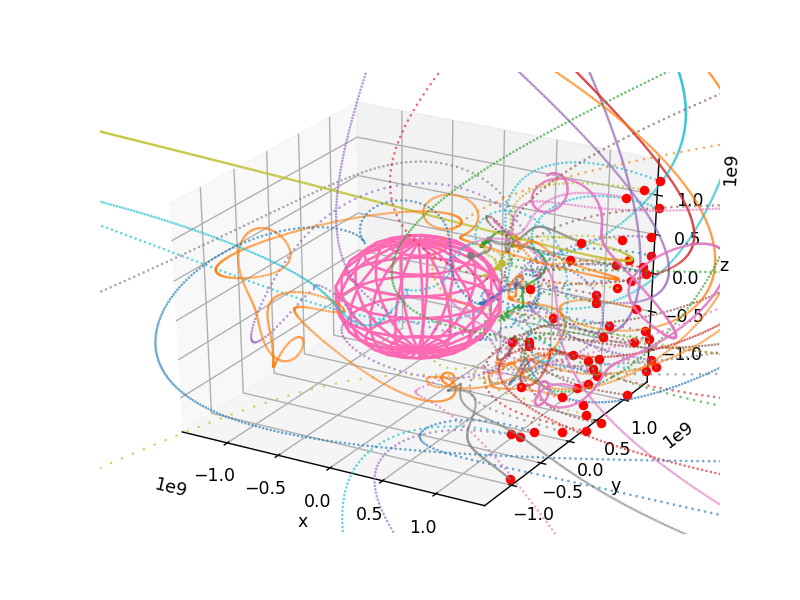

In [13]:
fig = plt.figure() # initialize 3-D matplotlib figure.
ax = fig.add_subplot(111, projection='3d')

for positions in posList:
    pos = np.array(positions[:,0:3]) # save state vector positions,
    vel = np.array(positions[:,3:6]) # velocities (x, y, z).

    ax.scatter3D(pos.T[0], pos.T[1], pos.T[2], alpha=0.75, s=0.2) # plot electron trajectories.
    ax.scatter3D(pos.T[0][0], pos.T[1][0], pos.T[2][0], color='red') 
    # signal starting location.
    
# label plot axes.
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

# set limits on visualized 3-D space.
c = 2*re;
plt.xlim(-c,c)
plt.ylim(-c,c)
ax.set_zlim(-c,c)

# draw sphere, scaled to re.
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = re * np.cos(u) * np.sin(v)
y = re * np.sin(u) * np.sin(v)
z = re * np.cos(v)
ax.plot_wireframe(x, y, z, color="hotpink")

plt.show()

<IPython.core.display.Javascript object>


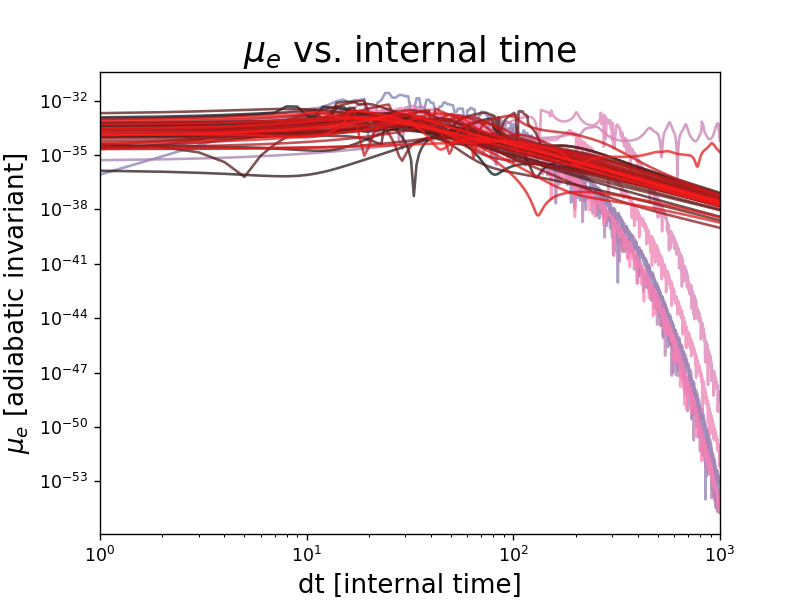

In [14]:
fig = plt.figure()

# create a mask for electrons which 
# travel below the atmopsheric cutoff.
indL=[]
for i, positions in enumerate(posList):
    cart = np.array(positions[:,:3])
    posmag = np.sqrt(cart.T[0]**2+cart.T[1]**2+cart.T[2]**2)
    if posmag[-1] < cut:
        indL.append(1)
    else:
        indL.append(0)
mask = np.array(indL) > 0
    
grad1 = np.linspace(0.5,1,len(np.array(mupL)[mask]))
for i,mu in enumerate(np.array(mupL)[mask]):
    cart = np.array(positions[:,:3])
    posmag = np.sqrt(cart.T[0]**2+cart.T[1]**2+cart.T[2]**2)
    plt.plot(np.arange(t0,tf,dt)/dt, mu, alpha=0.75,color=(grad1[i],.5,.7))
    
grad2 = np.linspace(0,1,len(np.array(mupL)[~mask]))
for i,mu in enumerate(np.array(mupL)[~mask]):
    cart = np.array(positions[:,:3])
    posmag = np.sqrt(cart.T[0]**2+cart.T[1]**2+cart.T[2]**2)
    plt.plot(np.arange(t0,tf,dt)/dt, mu, alpha=0.75,color=(grad2[i],.1,.1))
    
# plot cleanup:
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e0,tf/dt)
plt.xlabel(r'dt [internal time]',size=15)
plt.ylabel(r'$\mu_e$ [adiabatic invariant]',size=15)
plt.title(r'$\mu_e$ vs. internal time',size=20)

plt.show()

<IPython.core.display.Javascript object>


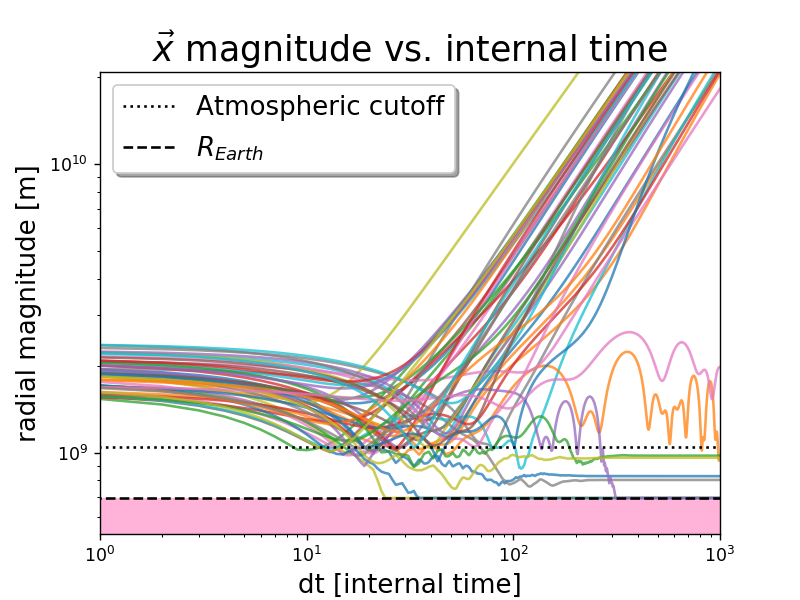

In [15]:
fig = plt.figure()

for positions in posList:
    cart = np.array(positions[:,:3])
    posmag = np.sqrt(cart.T[0]**2+cart.T[1]**2+cart.T[2]**2)
    plt.plot(np.arange(t0,tf,dt)/dt, posmag[:-1],alpha=0.75)
    
# plot cleanup:
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e0,tf/dt)
plt.ylim(0.75*re,30*re)
plt.xlabel(r'dt [internal time]',size=15)
plt.ylabel(r'radial magnitude [m]',size=15)
plt.axhspan(0.75*re, re, facecolor='hotpink', alpha=0.5)
plt.hlines(cut,0,tf,colors='black',linestyles='dotted',zorder=50,label=r'Atmospheric cutoff')
plt.hlines(re,0,tf,colors='black',linestyles='dashed',zorder=50,label=r'$R_{Earth}$')
plt.legend(prop = {"size": 15},shadow=True)
plt.title(r'$\vec{x}$ magnitude vs. internal time',size=20)

plt.show()

> Realistically, the earth's outermost atmosphere extends only a fraction of an Earth radii above the surface.
To heighten visual effects and explore various configurations, we change this cutoff to be more drastic, and subsequently, more visible!

<IPython.core.display.Javascript object>


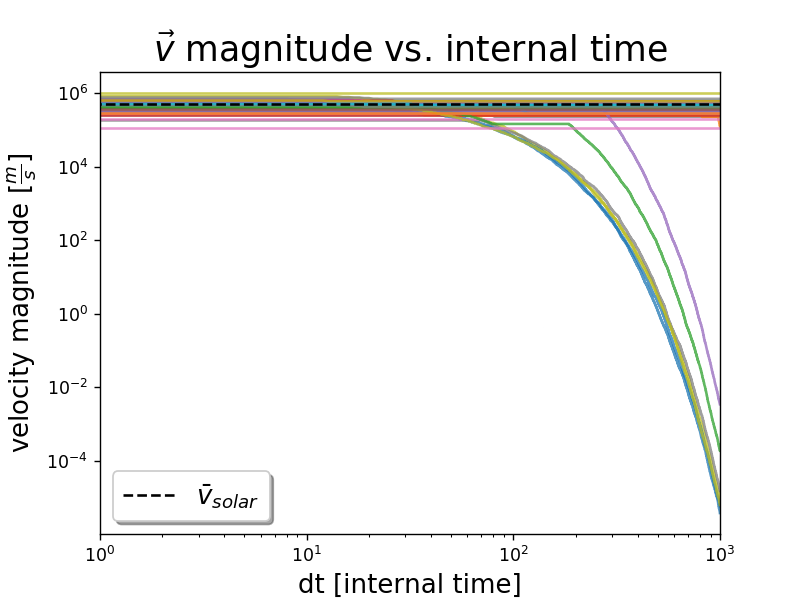

In [16]:
fig = plt.figure()

for positions in posList:
    cartvel = np.array(positions[:,3:6])
    velmag = np.sqrt(cartvel.T[0]**2+cartvel.T[1]**2+cartvel.T[2]**2)
    plt.plot(np.arange(t0,tf,dt)/dt, velmag[:-1],alpha=0.75)
    
plt.hlines(5*10**5,0,tf,colors='black',linestyles='dashed',zorder=50,label=r'$\bar{v}_{solar}$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e0,tf/dt)

plt.xlabel(r'dt [internal time]',size=15)
plt.ylabel(r'velocity magnitude [$\frac{m}{s}$]',size=15)
plt.legend(prop = {"size": 15},shadow=True)
plt.title(r'$\vec{v}$ magnitude vs. internal time',size=20)
    
plt.show()

-----
-----
-----

# References

[1]  Otto, Antonius (2004). “MHD Simulation of the Magnetosphere”, Geophysical Inst., Univ. Alaska, Fair-banks.

[2]  Jarmund, A. H. (2017). “A simple computational simulation of Northern Lights”. Norges T., Trondheim,Norway.

[3]  Baranoski,  et al. “Simulating the Dynamics of Auroral Phenomena”. ACM Transactions on Graphics,Vol. 24, No. 1, January 2005, Pages 37-59.

[4]  Stern,  David.  ”Secrets  of  the  Polar  Aurora”.  Created  14  November  2002,  re-formatted  10-23-2007. https://pwg.gsfc.nasa.gov/Education/aurora.htm